# COGS 118A - Project Checkpoint

# Names

- Antonio Aldama 
- Jie(MJ) Mei 
- Joshua Chen 
- Janet Ruiz


# Abstract 
Our project aims to train and test an algorithm to classify people with an annual income of less than or equal to 50k dollars and people with an annual income of more than 50k dollars. We will use census data collected in 1994 that contains categorical and continuous variables. First, we will clean our dataset and do exploratory data analysis using python libraries pandas and numpy. Then we will try different classification methods from SciKit-Learn (e.g. K Nearest neighbor, Support Vector Machine, Decision Tree) to find the best model possible. Finally, using a confusion matrix we will test the performance of each classification algorithm.

# Background

Societal inequalities and their implications are highlighted in censuses. Strmic-Pawl et al. note the need for “racial groups [to] be linked to tracking inequality” <a href="#source3"><sup id=”note3”>[1]</sup></a>. It is possible to investigate the relation between race and social disparities because the US, unlike many other countries, asks for racial information in its census. The importance of this income disparity is furthered given that there is a relationship between income distribution and health <a href="#source4"><sup id=”note4”>[2]</sup></a>. Ross used regression analyses to prove that populations with higher income inequality have higher mortality than more homogenous areas. The lower-income members are the ones likely to drive mortality rates upwards in these populations. Therefore, identifying the role of race in inequalities can help with better addressing these issues. 

Income inequality has been a prevalent problem in the United States. It is responsible for the income gaps among people of different races, genders, marital statuses, and occupations, etc. While the middle income population in America has decreased from 61% in 1971 to 51% in 2019, its shrinkage corresponds to the growth of the number of upper class households <a href="#source2"><sup id=”note2”>[3]</sup></a>. In addition, the growth of median middle class income from 1970 to 2018 is 49%, which is considerably less than the 64% counterpart of the upper class. On the other hand, the low income population remained relatively constant for the past 50 years. The high mobility between middle and upper class would not mitigate the perpetuating income gaps. As income gaps contribute to the discrepancies of purchasing power, they would consolidate the systematic economic inequality. Therefore, we are trying to evaluate which attributes in our dataset contribute to the discrepancy in annual incomes. 

According to the U.S. Census Bureau, the median income for Black households have significantly lagged other races while Asian households was the highest reported in 2020, while the poverty rates for Black and Hispanic were also higher compared to other races <a href="#source5"><sup id=”note5”>[4]</sup></a>. To combat this inequality, we aim to identify the other factors that contributed most to our prediction (other than race), and identify potential correlations between race + the other factor. This helps us determine what factors affect the inequality the most and would allow us to propose solutions to how we can combat this inequality. For example, if we found that education appears to be the factor that contributed most to our prediction, we can implement changes to the education system to help better combat income inequality.

Similar to the discrepancies with race, sex and gender can also affect income. Gomez-Cravioto et al. created a classification model to predict ‘current income’ based on ‘first income’ in alumni from various Mexican private universities. In their exploratory analysis they show that ‘gender’, ‘school’ (i.e. major), and ‘years worked foreign’ had the biggest effect on ‘current income’. When further comparing gender with ‘first income’ and ‘current income’ it shows that on average female alums make $3,151 and $26,845 less than male alums respectively <a href="#source6"><sup id=”note6”>[5]</sup></a>. Their results indicate that there exists a gender wage gap for university alums. Ultimately, even in populations that have completed higher education there is some form on inequity when it comes to gender and income. 

# Problem Statement

Income inequality in the United States is a significant issue. While top earners enjoy a disproportionately large amount of the country’s wealth, many others struggle to make ends meet. A person’s income can determine their standard of living, socioeconomic status, and, consequently, their access to resources and wellness. We aim to build a machine learning model that best predicts whether a person will make over/under 50k based on their age, education degree, marital status, and other variables. Being able to accurately classify whether a person makes over/under 50k is significant as finance, businesses, and policy makers can greatly benefit from it. In finance, the ability to accurately predict an individual’s income level can help financial institutions tailor their products and services to better serve their customers. In business marketing, this classification can help companies identify potential customers who are more likely to purchase their products, which will allow them to optimize their marketing strategies. In public policy, governments can use this classification to identify groups of individuals who may be at risk of poverty, allowing policymakers to design interventions to improve their financial conditions. Furthermore, through training the models, we will be able to find which variables contribute the most to the prediction, which provides insights as to how to combat income inequality. Furthermore, our problem is quantifiable because it could be expressed as f(x;w,b)={+1 if 1/(1+e-(wTx+b))>=0.5, -1 otherwise) in a logistic regression model. It is measurable because models could be evaluated by the confusion matrix metric based on the calculations of the recall and specificity rates. Last but not least, it is replicable because the dataset is publicly available for download so others can reproduce the process with similar techniques and packages. 




# Data

We are going to use the [Adult Data Set from UC Irvine’s machine learning repository](https://archive.ics.uci.edu/ml/datasets/Adult)


This dataset has 48842 observations, and 14 variables. An observation consists of a data point from the 1994 Census database. The observation includes age, workclass, fn|wgt (how many people each observation is estimated to represent), education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loss, hours per week, native-country. 

The critical variables are 
- age: continuous 
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical,  Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
- sex: Female, Male. 
- hours-per-week: continuous. 
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

We will have to clean the data because some observations have missing variables. We will remove those observations from our analysis. 


#Data Cleanup

In [1]:
#Imports
import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve, recall_score, precision_score, f1_score,accuracy_score, make_scorer
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

In [2]:
df = pd.read_csv("adult.csv")

We first want to check the data type of each column element.

In [3]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

Since workclass, education, marital.status, occupation, relationsihp, race, sex, native.country are all categorical variables, we use one hot encoding to covert them into a set of binary features

In [4]:
df2 = pd.get_dummies(df, columns=['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country'])

We determined that fnlwgt is not useful for our analysis and decided to drop it.


In [5]:
df2 = df2.drop(['fnlwgt'], axis = 1)

we also decided to remove rows that have missing values to make our analysis simpler


In [6]:
df2 = df2.replace('?', np.nan)
df2 = df2.dropna()

This is the final dataset we have decided to use

In [7]:
df2.head()

,age,education.num,capital.gain,capital.loss,hours.per.week,income,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,90,9,0,4356,40,<=50K,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,82,9,0,4356,18,<=50K,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,66,10,0,4356,40,<=50K,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,54,4,0,3900,40,<=50K,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,41,10,0,3900,40,<=50K,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [8]:
df2.shape

(32561, 108)

## Exploratory Data Analysis (EDA)

In [9]:
df2.describe()

,age,education.num,capital.gain,capital.loss,hours.per.week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,...,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456,0.056386,0.029483,0.064279,0.000215,0.697030,...,0.001136,0.003501,0.000369,0.002457,0.001566,0.000553,0.000584,0.895857,0.002058,0.000491
std,13.640433,2.572720,7385.292085,402.960219,12.347429,0.230670,0.169159,0.245254,0.014661,0.459549,...,0.033691,0.059068,0.019194,0.049507,0.039546,0.023506,0.024149,0.305451,0.045316,0.022162
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We decided to do a heatmap on all the variables and target output

<AxesSubplot: >

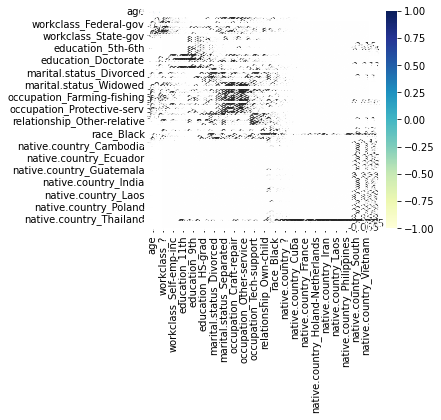

In [10]:
import seaborn as sns

numeric_cols = ['age', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
corr_numeric = df[numeric_cols].corr()
categorical_cols = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
df_categorical = pd.get_dummies(df[categorical_cols])
corr_categorical = df_categorical.corr()
corr_combined = pd.concat([corr_numeric, corr_categorical], axis=1)
sns.heatmap(corr_combined, cmap='YlGnBu', annot=True, square=True)

We also look at the distribution of the data, using pre one hot encoded dataframe

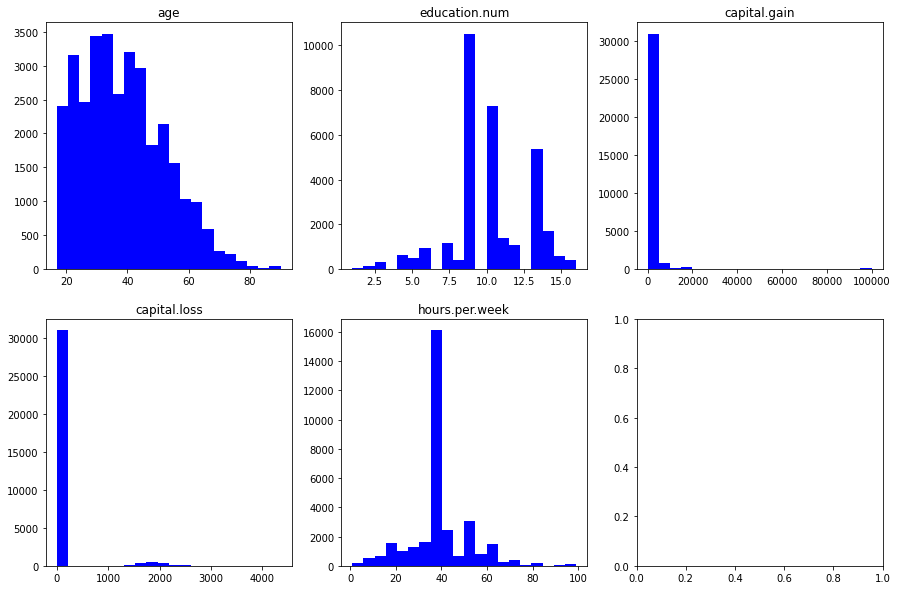

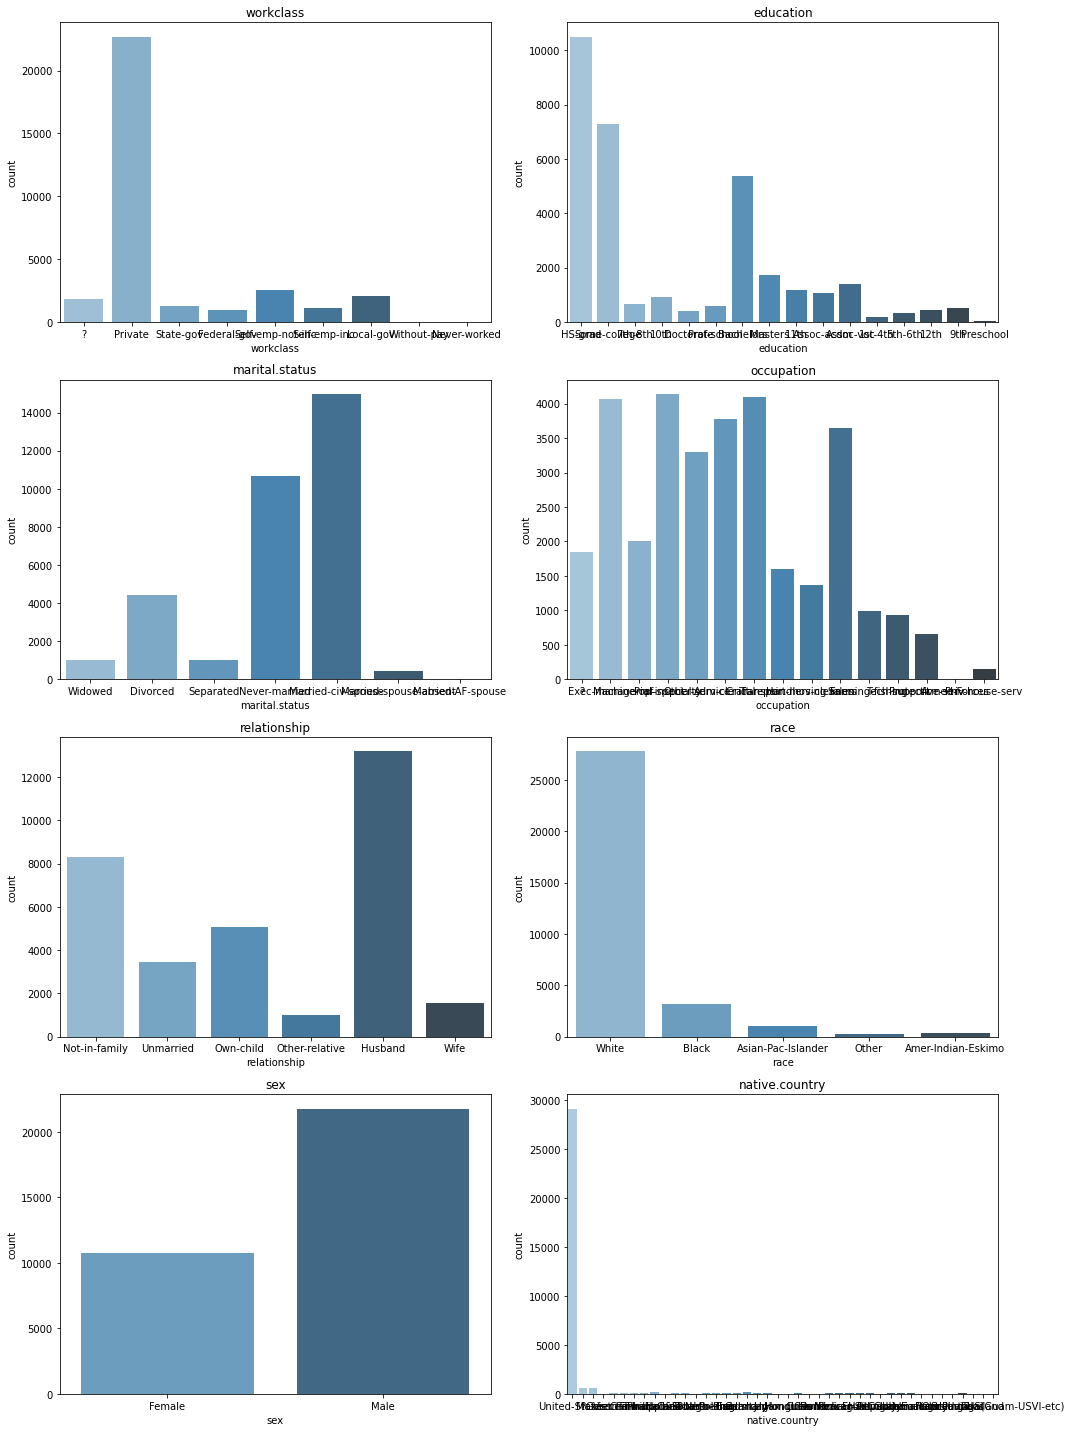

In [11]:
import matplotlib.pyplot as plt

numeric_cols = ['age', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

# Create histograms for all the numeric variables
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axs = axs.flatten()

for i, col in enumerate(numeric_cols):
    axs[i].hist(df[col], bins=20, color='blue')
    axs[i].set_title(col)
categorical_cols = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']

# Create count plots for all the categorical variables
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axs = axs.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=df, ax=axs[i], palette='Blues_d')
    axs[i].set_title(col)
plt.tight_layout()
plt.show()

Previous literature have suggested that age, sex, race, and education number contribute the most, we aim to explore the association between those and whether a person makes at least 50k. To see this, we converted the >= 50k to 1 and <=50 K to 0 in the income column. We also converted Female to 0 and Male to 1 in the Sex column, white, black, apac, other, amer-indian to 1,2,3,4,5 respectively in race. Note: We are using the pre-one hot encoded data

In [12]:
df["income"] = df["income"].replace(['>50K', '<=50K'],[1, 0])
df['sex'] = df['sex'].replace(['Male', 'Female'], [1,0])
df['race'] = df['race'].replace(['White', 'Black', 'Asian-Pac-Islander', 'Other', 'Amer-Indian-Eskimo'], [1,2,3,4,5])

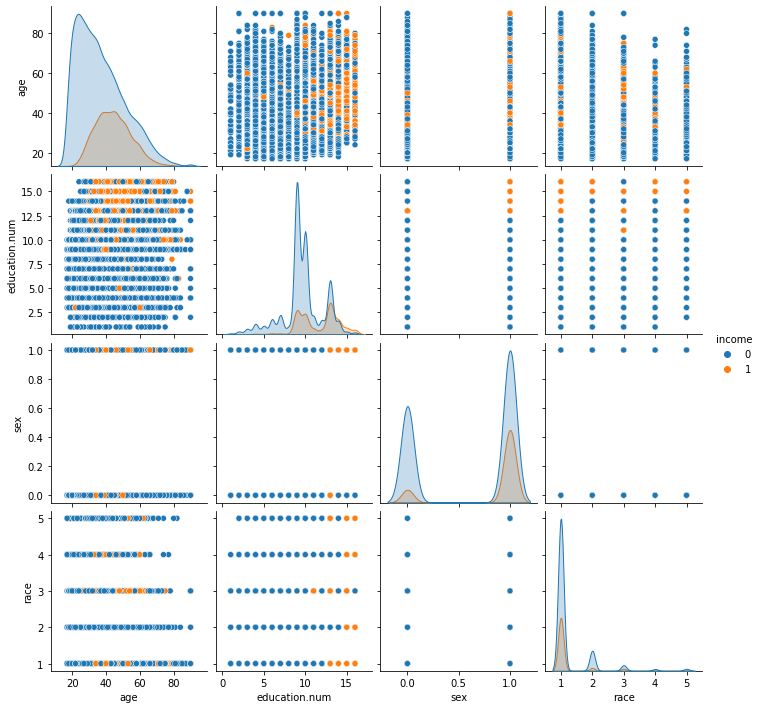

In [13]:
scatter = df[['age', 'education.num', 'sex', 'race', 'income']]
sns.pairplot(scatter, hue="income")

We also created a correlational matrix. Note: Also using pre one-hot encoded data

In [14]:
df.corr()

<ipython-input-14-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,fnlwgt,education.num,race,sex,capital.gain,capital.loss,hours.per.week,income
age,1.000000,-0.076646,0.036527,-0.036219,0.088832,0.077674,0.057775,0.068756,0.234037
fnlwgt,-0.076646,1.000000,-0.043195,-0.010265,0.026858,0.000432,-0.010252,-0.018768,-0.009463
education.num,0.036527,-0.043195,1.000000,-0.037536,0.012280,0.122630,0.079923,0.148123,0.335154
race,-0.036219,-0.010265,-0.037536,1.000000,-0.066823,-0.008580,-0.018148,-0.032226,-0.066876
sex,0.088832,0.026858,0.012280,-0.066823,1.000000,0.048480,0.045567,0.229309,0.215980
capital.gain,0.077674,0.000432,0.122630,-0.008580,0.048480,1.000000,-0.031615,0.078409,0.223329
capital.loss,0.057775,-0.010252,0.079923,-0.018148,0.045567,-0.031615,1.000000,0.054256,0.150526
hours.per.week,0.068756,-0.018768,0.148123,-0.032226,0.229309,0.078409,0.054256,1.000000,0.229689
income,0.234037,-0.009463,0.335154,-0.066876,0.215980,0.223329,0.150526,0.229689,1.000000


None of the variables alone seeems to have high correlation with income

We also checked the percentage of data that had income over 50K



In [15]:
num_greater_than_50k = (df['income'] == 1).sum()
total_records = df.shape[0]
percentage = (num_greater_than_50k / total_records) * 100
print("Percentage of records with income >50K:", percentage, "%")

Percentage of records with income >50K: 24.080955744602438 %


# Proposed Solution

Some of our potential solutions include logistic regression, K Nearest Neighbor, Support Vector Machine, and Decision Tree, etc. Therefore, the main python library that we would be using is SciKit-Learn and its various training algorithms. The main goal of using these models is to find the best model and the parameters that can best predict whether a person will make over 50k a year or not. With logistic regression, we can also infer which variable(s) influence the prediction the most. By discovering the characteristics of the data and the variable(s) that influence the prediction the most, we hope to apply some changes in those variables to help combat the inequality we see in the income of Americans. In addition, we would also use libraries panda and numpy to import the csv file and clean the data that we retrieved from the UCI repository. We will also be using the matplotlib and seaborn libraries to visualize the data and further determine which classifiers would be best for our problem.

# Evaluation Metrics

An evaluation metric that we will use is recall, precision, and F-value. We expect there to not be as many people that make over $50,000 a year. The median wage for 1994 is $16,118.02 <a href="#source1"><sup id=”note1”>[1]</sup></a>. Therefore, a model that simply always assigned a data point to the negative class would likely have a very high specificity and be correct most of the time. However, it would be a bad model. Our evaluation metrics will focus on testing whether the model correctly identifies the positive class. We will prioritize recall, as this will tell us how much of the positive class we are able to correctly identify. However, we will use precision to make sure that we are not incorrectly labeling too many points as positive. Therefore, we will seek a good F-value, prioritizing recall over precision. 
Below are the formulas to calculate each: 

recall = TP/(TP + FN)

precision = TP/(TP + FP)

F-value = (2 * recall * precision)/(precision + recall)

TP = True positive, FN = False negative, FP = False positive


# Preliminary results



# Logistic Regression Model




In [16]:
# fnlwgt not relevant for model. 
#TODO: Should we take it into account? fnlwgt is not a variable important for predicting, but it could be important when evaluating the model
X = df2.drop(['income'], axis=1)

# Target variable
y = df2['income']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)





In [17]:
def test_logistic_model(solver):
  logreg = LogisticRegression(max_iter=1000, solver=solver) # Can try different solvers
  logreg.fit(X_train, y_train)
  y_pred = logreg.predict(X_test)

  print("Solver:", solver.capitalize())

  # Calculate the confusion matrix
  cm = confusion_matrix(y_test, y_pred, labels=['<=50K', '>50K'])

  # Plot the confusion matrix
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['<=50K', '>50K'])
  disp.plot()
  disp.ax_.set_title(solver.capitalize() + ' Confusion Matrix')
  plt.show()


  y_pred_proba = logreg.predict_proba(X_test)[:, 1]

  # Calculate the FPR and TPR
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label='>50K')

  # Calculate the AUC
  auc_score = auc(fpr, tpr)

  # Plot the ROC curve
  plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score)
  plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(solver.capitalize() + ' ROC Curve')
  plt.legend(loc="lower right")
  plt.show()

  # Plot the Precision-Recall curve
  # Calculate the precision and recall
  precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba, pos_label='>50K')

  # Calculate the AUC
  auc_score = auc(recall, precision)

  # Plot the precision-recall curve
  plt.plot(recall, precision, color='blue', lw=2, label='PR curve (AUC = %0.2f)' % auc_score)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title(solver.capitalize() + ' Precision-Recall Curve')
  plt.legend(loc="lower left")
  plt.show()

  accuracy = accuracy_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred, pos_label='>50K')
  precision = precision_score(y_test, y_pred, pos_label='>50K')
  f1 = f1_score(y_test, y_pred, pos_label='>50K')
  print("Accuracy:", accuracy)
  print("Recall:", recall)
  print("Precision:", precision)
  print("F1 score:", f1)
  print('\n')


Solver: Liblinear


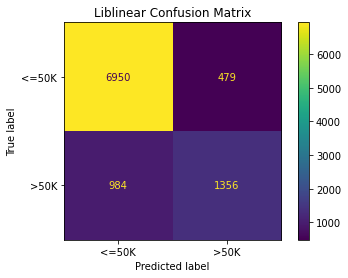

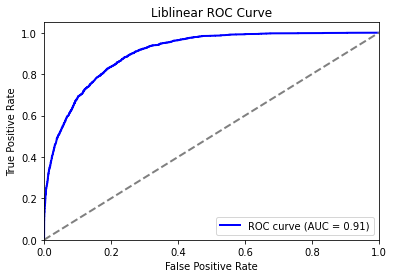

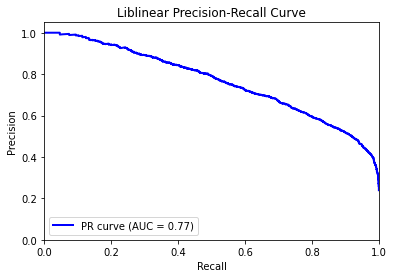

Accuracy: 0.8502405568635479
Recall: 0.5794871794871795
Precision: 0.7389645776566758
F1 score: 0.6495808383233534


Solver: Newton-cg


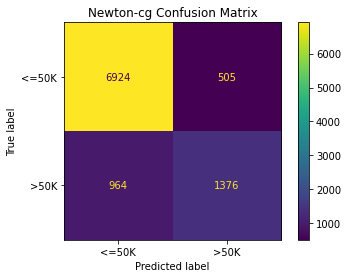

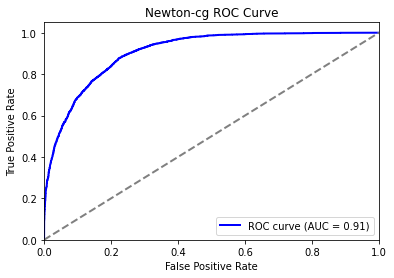

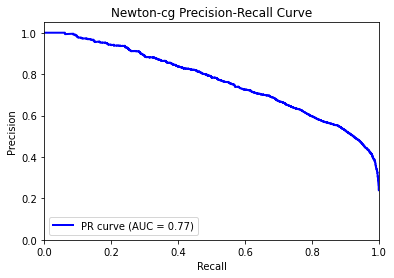

Accuracy: 0.8496263691268298
Recall: 0.588034188034188
Precision: 0.7315257841573631
F1 score: 0.6519782042170101


Solver: Sag


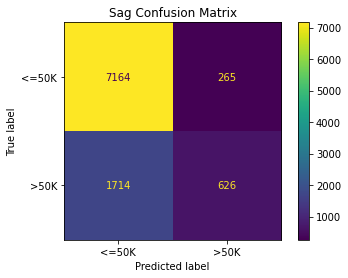

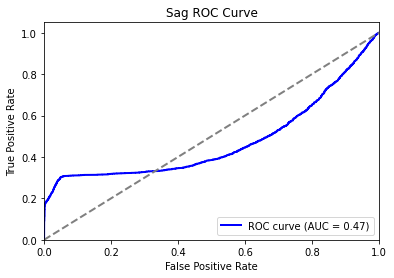

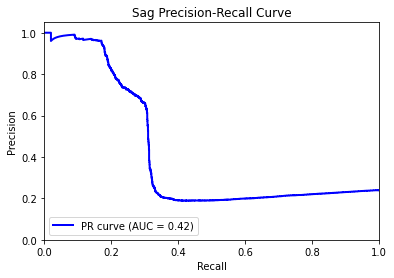

Accuracy: 0.7974204115057836
Recall: 0.2675213675213675
Precision: 0.7025813692480359
F1 score: 0.38749613122872173


Solver: Saga


/Users/admin/opt/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


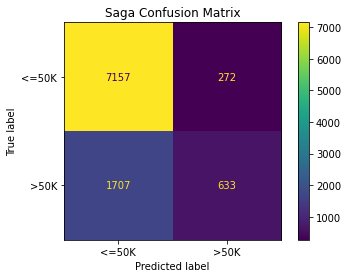

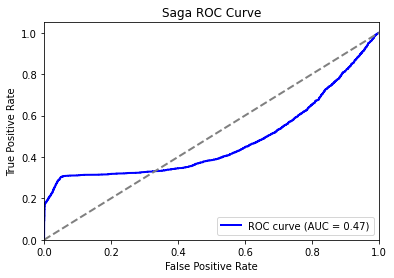

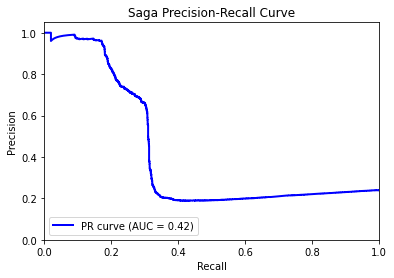

Accuracy: 0.7974204115057836
Recall: 0.2705128205128205
Precision: 0.6994475138121546
F1 score: 0.39013867488443754




In [18]:
test_logistic_model(solver='liblinear')
test_logistic_model(solver='newton-cg')
test_logistic_model(solver='sag')
test_logistic_model(solver='saga')

Both newton-cg and liblinear have similar performances. Since newton-cg has the best recall, and F1-score, we will choose this as the best model. Chance would have a recall of 0.25. Our recall of 0.604 is significanlty better. Similarly, the AUC in the ROC curve is notably better than random performance (0.5). The precision-recall curve also demonstrates that our model does remarkably better than chance. 






In [19]:
### START FEATURE
# If we need to say which features are most important 
from sklearn.feature_selection import RFE

logreg = LogisticRegression(max_iter=1000, solver='newton-cg') # Can try different solvers
logreg.fit(X_train, y_train)

# create the RFE object and fit the model
rfe = RFE(logreg, n_features_to_select=5)  # select the 5 most important features
rfe.fit(X_train, y_train)

# print the ranking of each feature
print("Feature ranking:", rfe.ranking_)

# print the names of the selected features
selected_features = X_train.columns[rfe.support_]
print("Selected features:", selected_features)

print("Feature ranking:", rfe.ranking_)

### END FEATURE 

Feature ranking: [ 94  55 103 102  91 101  27  95  62  61  35  84  68  16  96  60  93   2
   1   5  59  54  70  71   1  73  80  63   1  72  67   1   1  66  31  40
  74  92  48  41  49   9  34  15  90  12   4  10  29  21  20  52  86  57
  17   3  85  22  26  76  79  99  77  23  38  83  39  43  32   6  44   7
  98  69  64  37  42  81  18  88 100  75  87  51  56  82  50  36  24  65
  58  11  33  19  25  28  45  78  14  53  47  97  89  13  46   8  30]
Selected features: Index(['education_5th-6th', 'education_Doctorate', 'education_Prof-school',
       'marital.status_Married-AF-spouse',
       'marital.status_Married-civ-spouse'],
      dtype='object')
Feature ranking: [ 94  55 103 102  91 101  27  95  62  61  35  84  68  16  96  60  93   2
   1   5  59  54  70  71   1  73  80  63   1  72  67   1   1  66  31  40
  74  92  48  41  49   9  34  15  90  12   4  10  29  21  20  52  86  57
  17   3  85  22  26  76  79  99  77  23  38  83  39  43  32   6  44   7
  98  69  64  37  42  81  18  88 1

In [20]:
feature_ranks = dict(zip(X_train.columns, rfe.ranking_))
print("Feature ranking:")
for feature, rank in feature_ranks.items():
    print(f"{feature}: {rank}")

Feature ranking:
age: 94
education.num: 55
capital.gain: 103
capital.loss: 102
hours.per.week: 91
workclass_?: 101
workclass_Federal-gov: 27
workclass_Local-gov: 95
workclass_Never-worked: 62
workclass_Private: 61
workclass_Self-emp-inc: 35
workclass_Self-emp-not-inc: 84
workclass_State-gov: 68
workclass_Without-pay: 16
education_10th: 96
education_11th: 60
education_12th: 93
education_1st-4th: 2
education_5th-6th: 1
education_7th-8th: 5
education_9th: 59
education_Assoc-acdm: 54
education_Assoc-voc: 70
education_Bachelors: 71
education_Doctorate: 1
education_HS-grad: 73
education_Masters: 80
education_Preschool: 63
education_Prof-school: 1
education_Some-college: 72
marital.status_Divorced: 67
marital.status_Married-AF-spouse: 1
marital.status_Married-civ-spouse: 1
marital.status_Married-spouse-absent: 66
marital.status_Never-married: 31
marital.status_Separated: 40
marital.status_Widowed: 74
occupation_?: 92
occupation_Adm-clerical: 48
occupation_Armed-Forces: 41
occupation_Craft-rep

#KNN

In [ ]:
X = df2.drop(['income'], axis=1)

# Target variable
y = df2['income']

# One-hot encode the categorical variables

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#imports for knn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

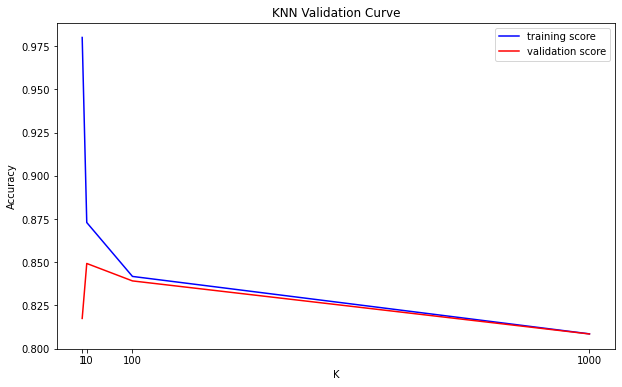

In [ ]:
k_range = [1,10,100,1000]
train_scores, val_scores = validation_curve(KNeighborsClassifier(), X_train, y_train, 
                                             param_name='n_neighbors', 
                                             param_range=k_range)

# Plot validation curve
plt.figure(figsize=(10, 6))
plt.title("KNN Validation Curve")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.xticks(k_range)
plt.plot(k_range, np.median(train_scores, 1), color='blue', label='training score')
plt.plot(k_range, np.median(val_scores, 1), color='red', label='validation score')
plt.legend(loc="best")
plt.show()

The accuracy score for this model is: 0.8223973794656567
              precision    recall  f1-score   support

       <=50K       0.86      0.91      0.89      7429
        >50K       0.65      0.55      0.60      2340

    accuracy                           0.82      9769
   macro avg       0.76      0.73      0.74      9769
weighted avg       0.81      0.82      0.82      9769



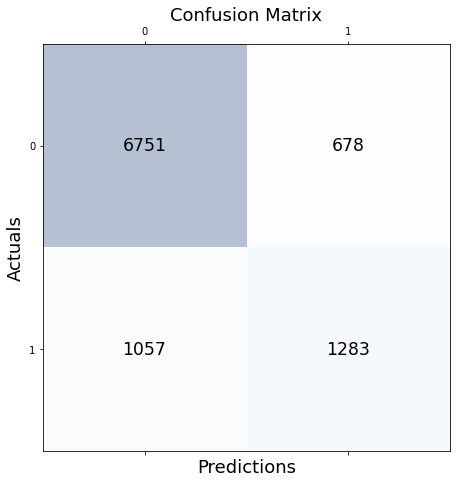

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve
# Preprocess the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("The accuracy score for this model is:", metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm2 = metrics.confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm2, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm2.shape[0]):
    for j in range(cm2.shape[1]):
        ax.text(x=j, y=i,s=cm2[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


Area under the Receiver Operating Characteristic curve: 0.8527430329052351


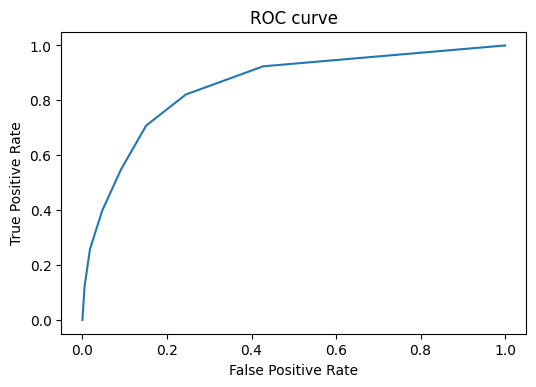

In [ ]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
y_encoded = l.fit_transform(y_test)

fpr = roc_curve(y_encoded, knn.predict_proba(X_test)[:,1])[0] # false positiv 
tpr = roc_curve(y_encoded, knn.predict_proba(X_test)[:,1])[1] # true positive 
roc_auc = roc_auc_score(y_encoded, knn.predict_proba(X_test)[:,1])

# plotting the ROC curve
plt.figure(dpi=100)
plt.plot(fpr, tpr)
plt.title('ROC curve') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
print('Area under the Receiver Operating Characteristic curve:', roc_auc)

Important features for KNN classification

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=3) # k specifies the number of top features to select
selector.fit(X_test, y_test)
X_selected = selector.transform(X_test)

knn.fit(X_selected, y_test)

# Print the importance of each feature
feature_importance = selector.scores_
top_feature_indices = selector.get_support(indices=True)

# Get the names of the top features
top_feature_names = [X.columns[i] for i in top_feature_indices]

# Print the name of the most important feature
top_feature_names

['education.num', 'marital.status_Married-civ-spouse', 'relationship_Husband']

Best param

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
pipe = Pipeline([
('scaler', StandardScaler()),
('selector', VarianceThreshold()),
('classifier', KNeighborsClassifier())
])

pipe.fit(X_train, y_train)
print('Training set score: ' + str(pipe.score(X_train,y_train)))
print('Test set score: ' + str(pipe.score(X_test,y_test)))

Training set score: 0.874956124956125
Test set score: 0.8238304841846658


In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
 'classifier__n_neighbors': [1, 3, 5, 7, 9]
}
# create grid search
grid = GridSearchCV(pipe, parameters,scoring=['accuracy', 'roc_auc_ovr', 'f1_micro'],
                    cv=5, n_jobs = -1, refit=False,verbose=0).fit(X_train, y_train)

The accuracy score for the optimized model is 0.8238304841846658


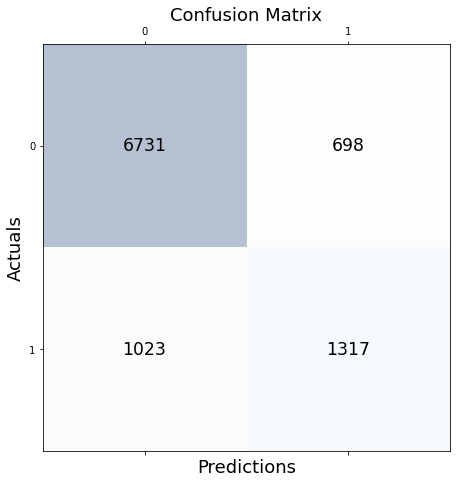

Area under the Receiver Operating Characteristic curve: 0.8408626737675061


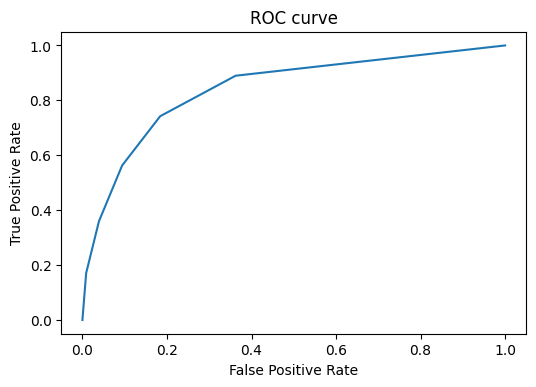

In [ ]:
# train on the entire training set with the model with highest accuracy from grid search
clf = pipe.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score2 = clf.score(X_test, y_test)
print("The accuracy score for the optimized model is", score2)
cm5 = metrics.confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm5, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm5.shape[0]):
    for j in range(cm5.shape[1]):
        ax.text(x=j, y=i,s=cm5[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
fpr = roc_curve(y_test, clf.predict_proba(X_test)[:,1], pos_label='>50K')[0] # false positiv 
tpr = roc_curve(y_test, clf.predict_proba(X_test)[:,1], pos_label='>50K')[1] # true positive 
roc_auc2 = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])
# plotting the ROC curve after optimization
plt.figure(dpi=100)
plt.plot(fpr, tpr)
plt.title('ROC curve') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
print('Area under the Receiver Operating Characteristic curve:', roc_auc2)

# Support Vector Machines Model

Due to the large magnitude of instances and features of the dataset. The training time of a support vector machines model was exceptional long (no responses after approximately 2 hours). Therefore, we pivoted our directions to a Linear support vector machines model as it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples.

To facilitate the training process, we decided to reduce the dimensionality of X and apply the Standardscaler as well.

In [ ]:
pca = PCA(n_components=100)

# Fit the PCA model on the data
pca.fit(X)

# Transform the data using the PCA model
X_pca = pca.transform(X)

scaler = StandardScaler()

# Fit the scaler on the data
scaler.fit(X_pca)

# Transform the data using the scaler
X_scaled = scaler.transform(X_pca)

# Obtain new training and testing data
X_train_Lsvm, X_test_Lsvm, y_train_Lsvm, y_test_Lsvm = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

X_train_Lsvm.shape

(22792, 100)

Let's define a test function to compare the strength of regularization terms on the performances of model.

In [ ]:
#linear support vector machines model
def LinearSVM_test(max_iter,C):
    #define a linear support vector machines model
    model = svm.LinearSVC(max_iter=max_iter,C=C)
    
    #fit the model on training data
    model.fit(X_train,y_train)
    
    #predict the outcomes based on test data of X
    y_pred=model.predict(X_test)
    
    #calculate the accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    #calculate the precision score
    precision = precision_score(y_test, y_pred,pos_label='>50K')
    
    #calculat the recall score
    recall = recall_score(y_test, y_pred,pos_label='>50K')
    
    #calculate the f1 score
    f1 = f1_score(y_test, y_pred,pos_label='>50K')
    
    print("\033[1m" + 'Regularization parameter:' + "\033[0m",C)
    print('accuracy:',accuracy)
    print('precision:',precision)
    print('recall:',recall)
    print('f1:',f1)
    print(' ')
    
    #plot a confusion matrix
    cm = confusion_matrix(y_test,y_pred,labels=['<=50K', '>50K'])
    disp = ConfusionMatrixDisplay(cm)
    disp.plot()
    plt.show()
    print(' ')
    
    #calculate the predicted labels
    scores = model.decision_function(X_test)
    
    #calculate the false and true positive rates
    fpr, tpr, thresholds = roc_curve(y_test, scores, pos_label='>50K')
    
    #calculate the area under the curve
    my_auc = auc(fpr,tpr)
    
    #plot the ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % my_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
    print(' ')
    
    #plot the precision and recall curve
    precision, recall, thresholds = precision_recall_curve(y_test,scores,pos_label='>50K')
    plt.plot(recall, precision)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.show()
    print(' ')

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Regularization parameter: 1
accuracy: 0.8514689323369843
precision: 0.7435616438356164
recall: 0.57991452991453
f1: 0.6516206482593038
 


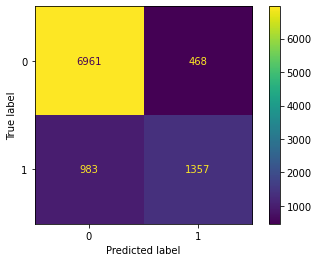

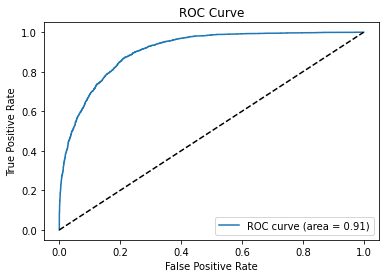

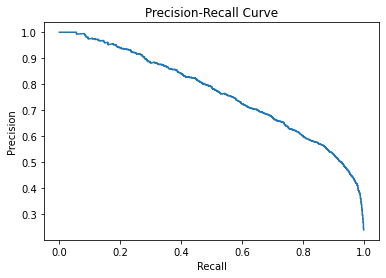

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Regularization parameter: 10
accuracy: 0.8504452861091207
precision: 0.7397708674304418
recall: 0.5794871794871795
f1: 0.6498921639108556
 


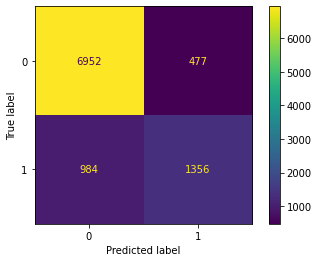

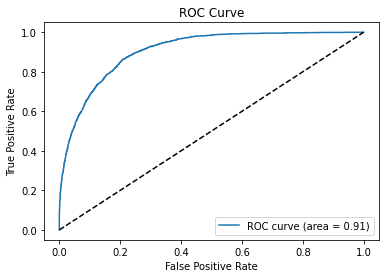

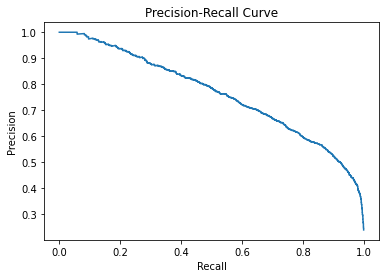

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Regularization parameter: 100
accuracy: 0.8402088238304842
precision: 0.6921558954119388
recall: 0.5995726495726496
f1: 0.6425463705060682
 


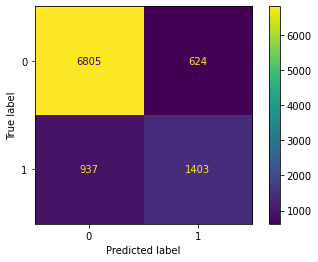

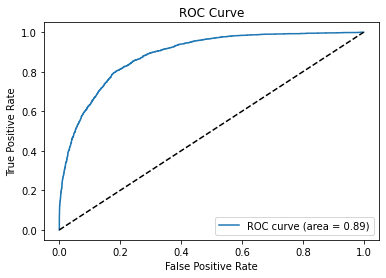

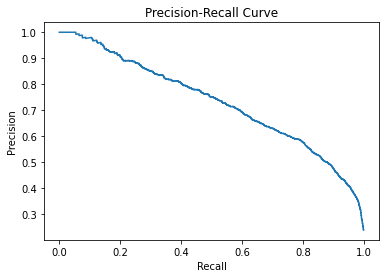

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Regularization parameter: 1000
accuracy: 0.7769474869485106
precision: 0.5236834363047955
recall: 0.7606837606837606
f1: 0.6203171284195853
 


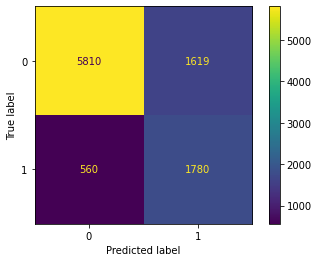

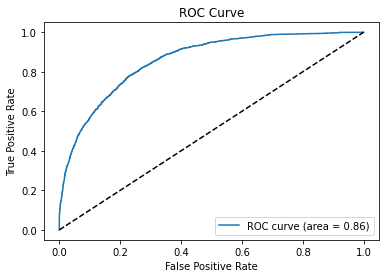

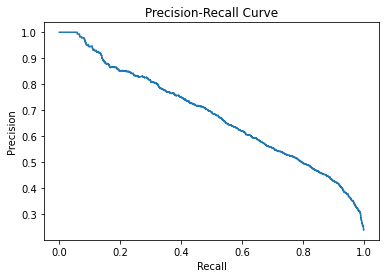

In [ ]:
## effect of different strength of regularization on model performance
LinearSVM_test(10000,1)
LinearSVM_test(10000,10)
LinearSVM_test(10000,100)
LinearSVM_test(10000,1000)

Based on the results and graphs above, we could tentively conclude that the model with the strength of regularization parameter as 1 performs the best as it has the highest average value of accuracy, precision, recall, and f1 scores. In addition, its ROC curve covers 88% of the areas.

In addition, we would like to perform a gridsearch,repeatedKfold, across all the hyperparameter Cs to evaluate the reliability of the results obtained from the graphs.

In [ ]:
#initiate the values for hyperparameters
params = {'C':[1,10,100,1000]}

#create a repeatedKFold object
rkf = RepeatedKFold(n_splits=5,n_repeats=5,random_state=42)

#initiate a LinearSVC model
model=svm.LinearSVC()

#pass in the model, Cs, and rkf into the gridsearch object
grid_search = GridSearchCV(model,param_grid=params,cv=rkf,verbose=3)

#fit on the training data
grid_search.fit(X_train,y_train)

#view the Grid Search CV Results
print("The mean accuracy scores for C=1,10,100,1000 are:",grid_search.cv_results_['mean_test_score'])
print("The rank of the accuracy scores for C=1,10,100,1000 are:",grid_search.cv_results_['rank_test_score'])

Fitting 25 folds for each of 4 candidates, totalling 100 fits


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/25] END ..............................C=1;, score=0.851 total time=   9.8s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/25] END ..............................C=1;, score=0.847 total time=   8.9s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/25] END ..............................C=1;, score=0.846 total time=   8.9s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/25] END ..............................C=1;, score=0.854 total time=   9.0s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/25] END ..............................C=1;, score=0.852 total time=   8.7s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 6/25] END ..............................C=1;, score=0.848 total time=   9.0s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 7/25] END ..............................C=1;, score=0.852 total time=   9.0s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 8/25] END ..............................C=1;, score=0.855 total time=   8.9s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 9/25] END ..............................C=1;, score=0.849 total time=   8.7s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 10/25] END .............................C=1;, score=0.848 total time=   8.8s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 11/25] END .............................C=1;, score=0.840 total time=   8.9s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 12/25] END .............................C=1;, score=0.853 total time=   9.0s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 13/25] END .............................C=1;, score=0.852 total time=   8.9s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 14/25] END .............................C=1;, score=0.855 total time=   8.8s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 15/25] END .............................C=1;, score=0.849 total time=   8.8s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 16/25] END .............................C=1;, score=0.842 total time=   8.7s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 17/25] END .............................C=1;, score=0.857 total time=   8.6s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 18/25] END .............................C=1;, score=0.852 total time=   8.8s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 19/25] END .............................C=1;, score=0.857 total time=   9.1s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 20/25] END .............................C=1;, score=0.846 total time=   9.0s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 21/25] END .............................C=1;, score=0.839 total time=   8.9s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 22/25] END .............................C=1;, score=0.853 total time=   8.9s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 23/25] END .............................C=1;, score=0.852 total time=   8.7s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 24/25] END .............................C=1;, score=0.852 total time=   8.7s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 25/25] END .............................C=1;, score=0.855 total time=   9.0s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/25] END .............................C=10;, score=0.836 total time=   9.3s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/25] END .............................C=10;, score=0.832 total time=   9.4s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/25] END .............................C=10;, score=0.835 total time=   9.3s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/25] END .............................C=10;, score=0.835 total time=   9.5s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/25] END .............................C=10;, score=0.824 total time=   9.4s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 6/25] END .............................C=10;, score=0.827 total time=   9.3s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 7/25] END .............................C=10;, score=0.836 total time=   9.5s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 8/25] END .............................C=10;, score=0.826 total time=   9.7s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 9/25] END .............................C=10;, score=0.822 total time=   9.1s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 10/25] END ............................C=10;, score=0.837 total time=   9.2s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 11/25] END ............................C=10;, score=0.825 total time=   9.3s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 12/25] END ............................C=10;, score=0.838 total time=   9.6s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 13/25] END ............................C=10;, score=0.839 total time=   9.5s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 14/25] END ............................C=10;, score=0.832 total time=   9.2s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 15/25] END ............................C=10;, score=0.830 total time=   9.3s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 16/25] END ............................C=10;, score=0.834 total time=   9.7s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 17/25] END ............................C=10;, score=0.843 total time=   9.4s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 18/25] END ............................C=10;, score=0.839 total time=   9.3s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 19/25] END ............................C=10;, score=0.846 total time=   9.3s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 20/25] END ............................C=10;, score=0.820 total time=   9.2s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 21/25] END ............................C=10;, score=0.824 total time=   9.5s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 22/25] END ............................C=10;, score=0.838 total time=   9.4s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 23/25] END ............................C=10;, score=0.833 total time=   9.4s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 24/25] END ............................C=10;, score=0.840 total time=   9.4s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 25/25] END ............................C=10;, score=0.839 total time=   9.4s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/25] END ............................C=100;, score=0.756 total time=   9.3s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/25] END ............................C=100;, score=0.798 total time=   9.5s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/25] END ............................C=100;, score=0.800 total time=   9.5s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/25] END ............................C=100;, score=0.760 total time=   9.6s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/25] END ............................C=100;, score=0.796 total time=   9.7s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 6/25] END ............................C=100;, score=0.770 total time=   9.6s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 7/25] END ............................C=100;, score=0.765 total time=   9.4s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 8/25] END ............................C=100;, score=0.794 total time=   9.7s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 9/25] END ............................C=100;, score=0.767 total time=   9.6s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 10/25] END ...........................C=100;, score=0.792 total time=   9.4s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 11/25] END ...........................C=100;, score=0.793 total time=   9.6s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 12/25] END ...........................C=100;, score=0.774 total time=   9.6s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 13/25] END ...........................C=100;, score=0.791 total time=  10.0s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 14/25] END ...........................C=100;, score=0.758 total time=   9.4s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 15/25] END ...........................C=100;, score=0.792 total time=   9.6s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 16/25] END ...........................C=100;, score=0.785 total time=   9.8s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 17/25] END ...........................C=100;, score=0.756 total time=   9.7s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 18/25] END ...........................C=100;, score=0.793 total time=   9.6s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 19/25] END ...........................C=100;, score=0.795 total time=   9.6s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 20/25] END ...........................C=100;, score=0.761 total time=   9.4s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 21/25] END ...........................C=100;, score=0.727 total time=   9.6s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 22/25] END ...........................C=100;, score=0.759 total time=   9.9s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 23/25] END ...........................C=100;, score=0.811 total time=   9.7s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 24/25] END ...........................C=100;, score=0.753 total time=   9.6s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 25/25] END ...........................C=100;, score=0.780 total time=   9.6s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/25] END ...........................C=1000;, score=0.740 total time=   9.6s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/25] END ...........................C=1000;, score=0.756 total time=   9.4s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/25] END ...........................C=1000;, score=0.740 total time=   9.5s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/25] END ...........................C=1000;, score=0.763 total time=   9.7s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/25] END ...........................C=1000;, score=0.783 total time=   9.6s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 6/25] END ...........................C=1000;, score=0.732 total time=   9.7s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 7/25] END ...........................C=1000;, score=0.751 total time=   9.8s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 8/25] END ...........................C=1000;, score=0.773 total time=   9.4s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 9/25] END ...........................C=1000;, score=0.778 total time=   9.8s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 10/25] END ..........................C=1000;, score=0.773 total time=   9.7s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 11/25] END ..........................C=1000;, score=0.725 total time=   9.7s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 12/25] END ..........................C=1000;, score=0.772 total time=   9.6s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 13/25] END ..........................C=1000;, score=0.768 total time=   9.8s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 14/25] END ..........................C=1000;, score=0.800 total time=   9.4s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 15/25] END ..........................C=1000;, score=0.763 total time=   9.2s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 16/25] END ..........................C=1000;, score=0.791 total time=   9.6s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 17/25] END ..........................C=1000;, score=0.784 total time=   9.8s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 18/25] END ..........................C=1000;, score=0.756 total time=   9.5s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 19/25] END ..........................C=1000;, score=0.758 total time=   9.6s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 20/25] END ..........................C=1000;, score=0.775 total time=   9.8s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 21/25] END ..........................C=1000;, score=0.737 total time=   9.6s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 22/25] END ..........................C=1000;, score=0.770 total time=   9.6s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 23/25] END ..........................C=1000;, score=0.743 total time=   9.7s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 24/25] END ..........................C=1000;, score=0.738 total time=   9.5s


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 25/25] END ..........................C=1000;, score=0.794 total time=   9.8s
The mean accuracy scores for C=1,10,100,1000 are: [0.85023711 0.8332485  0.77698391 0.7624611 ]
The rank of the accuracy scores for C=1,10,100,1000 are: [1 2 3 4]


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


The results of the performance of hyperparameters C obtained from the graphs earlier do match with those accquired from the repeatedKFold gridsearch. Therefore, we conclude that C=1 works the best for a linearSVM model in this case.

# Decision Tree Model

In [21]:
X = df2.drop(['income'], axis = 1)
y = df2['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

First, we will look at the metrics of a default decision tree. 

In [22]:
#default tree
dt_default = DecisionTreeClassifier(random_state = 42)
dt_default.fit(X_train, y_train)
yhat_train = dt_default.predict(X_train)
yhat_test = dt_default.predict(X_test)

In [23]:
def evaluate_dt(dt_clf):
    print("Train Accuracy :", accuracy_score(y_train, dt_clf.predict(X_train)))
    print("Train Recall :", recall_score(y_train, dt_clf.predict(X_train), pos_label = '>50K'))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_clf.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_clf.predict(X_test)))
    print("Test Recall :", recall_score(y_test, dt_clf.predict(X_test), pos_label = '>50K'))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_clf.predict(X_test)))

Train Accuracy : 0.9806511056511057
Train Recall : 0.9340119978185785
Train Confusion Matrix:
[[17213    78]
 [  363  5138]]
--------------------------------------------------
Test Accuracy : 0.8277203398505476
Test Recall : 0.6175213675213675
Test Confusion Matrix:
[[6641  788]
 [ 895 1445]]

classificiation report on test set performance
              precision    recall  f1-score   support

       <=50K       0.88      0.89      0.89      7429
        >50K       0.65      0.62      0.63      2340

    accuracy                           0.83      9769
   macro avg       0.76      0.76      0.76      9769
weighted avg       0.83      0.83      0.83      9769




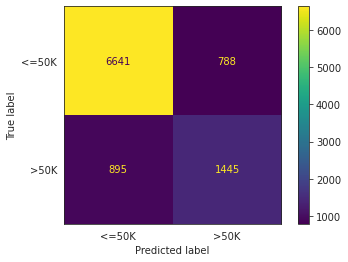

In [24]:
#accuracy measures
evaluate_dt(dt_default)
print()
print('classificiation report on test set performance')
print(classification_report(y_test, yhat_test))
print()

with sns.axes_style('white'):
    ConfusionMatrixDisplay.from_predictions(y_test, yhat_test)

In [31]:
#function to plot visual of tree
from sklearn.tree import plot_tree
def dt_vis(dt_clf):
    fig = plt.figure(figsize=(20,15))
    _ = plot_tree(dt_clf,
                       feature_names=X.columns,
                       class_names=['<=50K', ">50K"],
                       filled=True)

In [32]:
def dt_depth(max_depth):
  clf = DecisionTreeClassifier(max_depth = max_depth, random_state = 42).fit(X_train,y_train)
  return clf
def dt_splits(min_samples_split):
  clf = DecisionTreeClassifier(min_samples_split = min_samples_split, random_state = 42).fit(X_train,y_train)
  return clf

Setting max_depth = 3 allows for a more time saving and clean visualization of our decision tree. Looking at the metrics, it also gives us a more stable model.

Train Accuracy : 0.8439803439803439
Train Recall : 0.5164515542628613
Train Confusion Matrix:
[[16395   896]
 [ 2660  2841]]
--------------------------------------------------
Test Accuracy : 0.8436892210052206
Test Recall : 0.5085470085470085
Test Confusion Matrix:
[[7052  377]
 [1150 1190]]


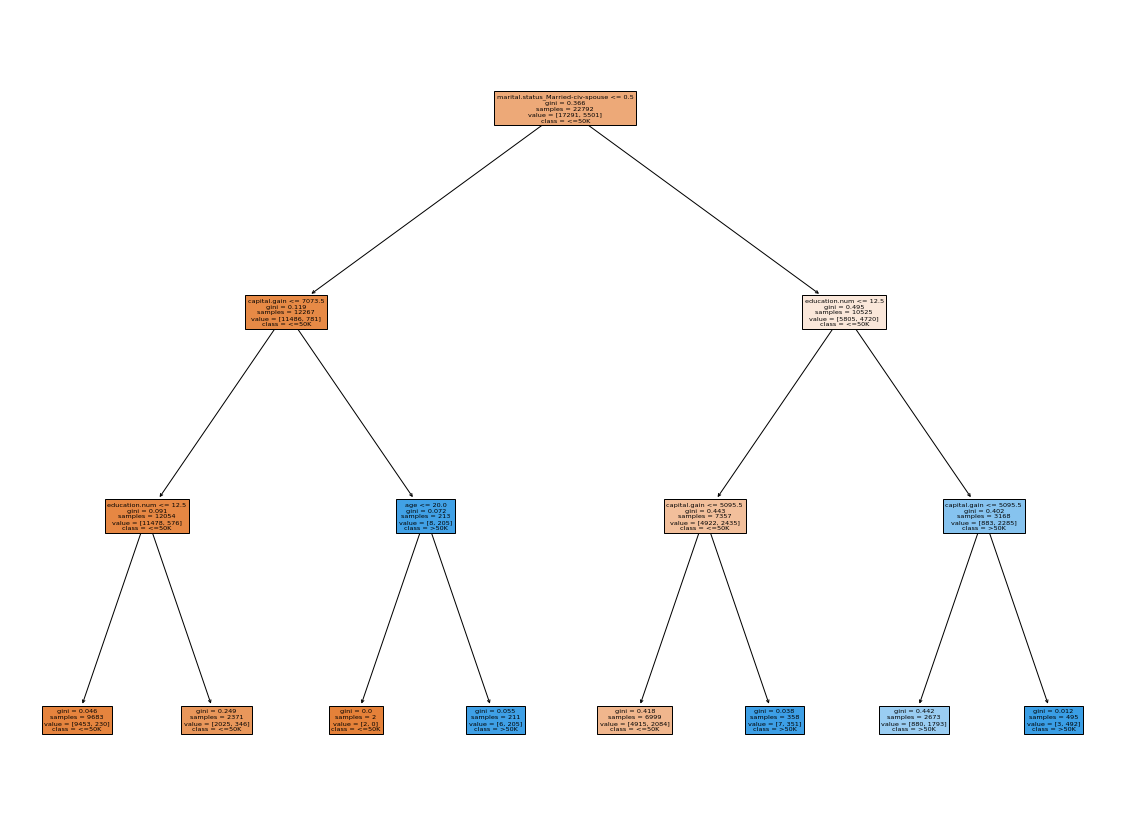

In [33]:
dt_depth_3 = dt_depth(max_depth = 3)
dt_vis(dt_depth_3)
evaluate_dt(dt_depth_3)

As depth increases, the model will likely overfit.

In [34]:
dt_depth_20 = dt_depth(max_depth = 20)
evaluate_dt(dt_depth_20)

Train Accuracy : 0.9323885573885574
Train Recall : 0.8287584075622614
Train Confusion Matrix:
[[16692   599]
 [  942  4559]]
--------------------------------------------------
Test Accuracy : 0.8427679394001433
Test Recall : 0.6461538461538462
Test Confusion Matrix:
[[6721  708]
 [ 828 1512]]


A smaller min_samples_split will tend to overfit.

In [36]:
dt_split_3 = dt_splits(3)
evaluate_dt(dt_split_3)

Train Accuracy : 0.9664355914355914
Train Recall : 0.8751136157062352
Train Confusion Matrix:
[[17213    78]
 [  687  4814]]
--------------------------------------------------
Test Accuracy : 0.8328385709898659
Test Recall : 0.6008547008547008
Test Confusion Matrix:
[[6730  699]
 [ 934 1406]]


In [37]:
dt_split_20 = dt_splits(20)
evaluate_dt(dt_split_20)

Train Accuracy : 0.9098806598806599
Train Recall : 0.7500454462824941
Train Confusion Matrix:
[[16612   679]
 [ 1375  4126]]
--------------------------------------------------
Test Accuracy : 0.8483979936533934
Test Recall : 0.6222222222222222
Test Confusion Matrix:
[[6832  597]
 [ 884 1456]]


In [38]:
#grid seacrh
params = {'max_depth':[3,5,7,10],
          'min_samples_split':[5,8,10,15],
          'criterion':['gini','entropy'],}

# Define the scoring function as recall with positive label '>50K'
scorer = make_scorer(recall_score, pos_label='>50K')

grid_search = GridSearchCV(estimator=dt_default,param_grid=params,cv=5,n_jobs=-1, verbose=True, scoring=scorer)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_split': [5, 8, 10, 15]},
             scoring=make_scorer(recall_score, pos_label=>50K), verbose=True)

Grid Search tells us that the best parameters to use for criterion, max_depth, and min_samples_split are 'gini', 10, and 15, respectively. These values give us the best recall of 0.61 for the test data. 

In [39]:
print('Best Parameters:', grid_search.best_params_, end='\n\n')
print('Best Score:', grid_search.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 15}

Best Score: 0.5882597638510445


In [40]:
#decision tree with best parameters
dt_grid_hyper = DecisionTreeClassifier(criterion = 'gini', max_depth = 10, min_samples_split = 15)
dt_grid_hyper.fit(X_train,y_train)

evaluate_dt(dt_grid_hyper)

Train Accuracy : 0.8686381186381187
Train Recall : 0.600799854571896
Train Confusion Matrix:
[[16493   798]
 [ 2196  3305]]
--------------------------------------------------
Test Accuracy : 0.8553587880028662
Test Recall : 0.5606837606837607
Test Confusion Matrix:
[[7044  385]
 [1028 1312]]


training set accuracy (n=22792): 0.869
test set accuracy (n=9769): 0.855

classificiation report on test set performance
              precision    recall  f1-score   support

       <=50K       0.88      0.89      0.89      7429
        >50K       0.65      0.62      0.63      2340

    accuracy                           0.83      9769
   macro avg       0.76      0.76      0.76      9769
weighted avg       0.83      0.83      0.83      9769




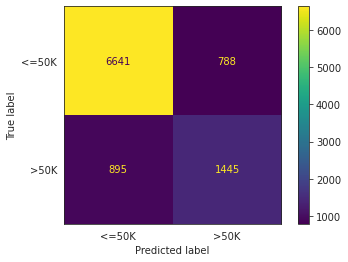

In [41]:
yhat_train_grid = dt_grid_hyper.predict(X_train)
yhat_test_grid = dt_grid_hyper.predict(X_test)

grid_acc_train = accuracy_score(y_train, yhat_train_grid)
grid_acc_test = accuracy_score(y_test, yhat_test_grid)

print(f'training set accuracy (n={y_train.shape[0]}): {grid_acc_train:4.3f}')
print(f'test set accuracy (n={y_test.shape[0]}): {grid_acc_test:4.3f}')
print()
print('classificiation report on test set performance')
print(classification_report(y_test, yhat_test))
print()

with sns.axes_style('white'):
    ConfusionMatrixDisplay.from_predictions(y_test, yhat_test)

# Ethics & Privacy

Possible ethics and privacy concerns during data collection can be informed consent and personally identifiable information exposure. To account for these issues people who participate in the census should be made aware that their information can be used for statistical research. Our dataset does not contain any names, identification numbers, or addresses; this reduces the possibility of personally identifiable information exposure. There is only enough information provided to draw a statistical model of the population. Additionally, because the census is a voluntary survey, collection bias, seen through nonresponse bias, is a big concern. Although the information provided by people cannot be used against them, certain communities (e.g. undocumented) may fear retaliation from the government if they participate. Other groups of people who may not respond are people who work multiple jobs, people in poverty, and people with no permanent address. Excluding their information from our model’s training will not give us predictive results with the population. Another issue that may arise during modeling may be proxy discrimination. Because race and sex will potentially be included as variables that predict income, we may model discrimination towards marginalized communities (e.g. people of color and women) who tend to work in lower paying industries.

# Team Expectations 

- Maintain efficient communication
- Notify other team members about file commits
- Show up to meetings on time
- Divide up the work equally and fairly
- Start planning early to avoid procrastination
- Let others know if you run into obstacles


# Project Timeline Proposal


| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 2/19  |  11 AM |  Brainstorm topics/questions (all)  | Determine best form of communication; Discuss and decide on final project topic; discuss hypothesis; begin background research | 
| 2/21  |  10 AM |  Do background research on topic (all) | Discuss ideal dataset(s) and ethics; draft project proposal | 
| 2/22  | 10 AM  | Edit, finalize, and submit proposal; Search for datasets (all)  | Discuss Wrangling and possible analytical approaches; Assign group members to lead each specific part   |
| 2/24  | 6 PM  | Import & Wrangle Data ,do some EDA (Antonio) | Review/Edit wrangling/EDA; Discuss Analysis Plan   |
| 3/6  | 12 PM  | Finalize wrangling/EDA; Begin programming for project (Joshua) | Discuss/edit project code; Complete project |
| 3/8  | 12 PM  | Complete analysis; Draft results/conclusion/discussion (MJ)| Turn in project checkpoint |
| 3/15  | Before 11:59 PM  | Meet to go over everyone's work so far | Meet to discuss everyone’s work so far. |
| 3/22  | Before 11:59 PM  | NA | Turn in Final Project  |

# Footnotes
<p id=”source1”> 1.<a href=”#note1”>^</a>: Social Security Administration. Measures Of Central Tendency For Wage Data.https://www.ssa.gov/oact/cola/central.html. Accessed 20 Feb. 2023. </p>
<p id=”source2”> 2.<a href=”#note2”>^</a>: Pew Research Center. Trends in income and wealth inequality. https://www.pewresearch.org/social-trends/2020/01/09/trends-in-income-and-wealth-inequality/. Accessed 20 Feb. 2023. </p>
<p id=”source3”> 3.<a href=”#note3”>^</a>: Strmic-Pawl, H. V., Jackson, B. A., & Garner, S. (2017). Race counts: Racial and ethnic data on the U.S. Census and the implications for tracking inequality. Sociology of Race and Ethnicity, 4(1), 1–13. https://doi.org/10.1177/2332649217742869 </p>
<p id=”source4”> 4.<a href=”#note4”>^</a>: Ross, N. A. (2000). Relation between income inequality and mortality in Canada and in the United States: Cross Sectional Assessment using census data and vital statistics. BMJ, 320(7239), 898–902. https://doi.org/10.1136/bmj.320.7239.898 </p>
<p id=”source5”> 5.<a href=”#note5”>^</a>: Waddington, David. “Census Bureau Statistics Measure Equity Gaps across Demographic Groups.” Census.gov, 10 June 2022, https://www.census.gov/library/stories/2021/09/understanding-equity-through-census-bureau-data.html. </p>
<p id="source6">6.<a href=”#note6”>^</a>: Gomez-Cravioto, D.A., Diaz-Ramos, R.E., Hernandez-Gress, N. et al. Supervised machine learning predictive analytics for alumni income. J Big Data 9, 11 (2022). https://doi.org/10.1186/s40537-022-00559-6 </p>
